## Install package growthrates and the jupyter notebook extension for R

In [1]:
#install.packages('IRkernel')
#IRkernel::installspec()  # to register the kernel in the current R installation
#install.packages("growthrates")
library(growthrates)
library(lubridate)
library(ggplot2)
library(reshape2)

Warning message:
"package 'growthrates' was built under R version 3.6.3"
Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 3.6.3"
Loading required package: deSolve

Warning message:
"package 'deSolve' was built under R version 3.6.3"
Warning message:
"package 'lubridate' was built under R version 3.6.3"

Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'reshape2' was built under R version 3.6.3"


## Load the data and create dataframe for each medium

In [2]:
rcm_mgam<-read.table("Data/FECALIBACTERIUM PRAUSNITZII_mGAM_rcm", header = T)
time_temp<-read.table("Data/time_temp", header=T)
time<-as.numeric(lubridate::as.difftime(as.character(time_temp[,1])))
rcm_mgam<-cbind(time,rcm_mgam)

In [3]:
head(rcm_mgam)
tail(rcm_mgam) #last time point: 1322.067 minutes (22 hours)

,time,rcm1,rcm2,rcm3,mgam1,mgam2,mgam3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.066667,0.135,0.158,0.154,0.075,0.068,0.054
2,62.066667,0.176,0.220,0.219,0.094,0.091,0.072
3,122.066667,0.262,0.320,0.281,0.126,0.127,0.097
4,182.066667,0.321,0.390,0.375,0.152,0.157,0.115
5,242.066667,0.400,0.484,0.471,0.170,0.177,0.133
6,302.066667,0.488,0.564,0.579,0.203,0.212,0.180


,time,rcm1,rcm2,rcm3,mgam1,mgam2,mgam3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,1022.067,0.838,1.313,1.353,0.165,0.179,0.131
19,1082.067,0.966,1.349,1.385,0.163,0.179,0.131
20,1142.067,1.002,1.344,1.402,0.160,0.178,0.130
21,1202.067,1.031,1.341,1.394,0.158,0.176,0.128
22,1262.067,1.252,1.326,1.372,0.157,0.175,0.127
23,1322.067,1.244,1.320,1.357,0.152,0.170,0.123


## RCM

Bring data in high format using melt():

In [4]:
rcm_high <- melt(rcm_mgam[,1:4], id.vars="time")
head(rcm_high)

,time,variable,value
,<dbl>,<fct>,<dbl>
1,2.066667,rcm1,0.135
2,62.066667,rcm1,0.176
3,122.066667,rcm1,0.262
4,182.066667,rcm1,0.321
5,242.066667,rcm1,0.400
6,302.066667,rcm1,0.488


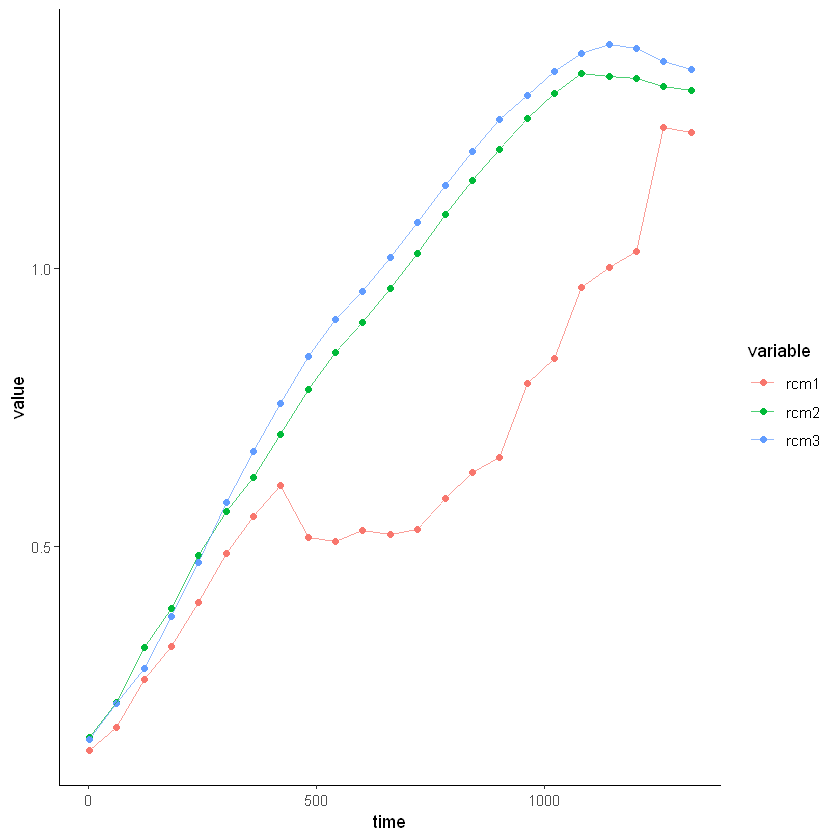

In [5]:
ggplot2::theme_set(theme_classic())
ggrcm<-ggplot(rcm_high, aes(x = time, y = value, col=variable)) + geom_point()+ geom_line(alpha=0.7)
ggrcm

## MGAM

Again bring in high format and plot the growth

In [6]:
mgam_high <- melt(rcm_mgam[,c(1,5:7)], id.vars="time")
head(mgam_high)

,time,variable,value
,<dbl>,<fct>,<dbl>
1,2.066667,mgam1,0.075
2,62.066667,mgam1,0.094
3,122.066667,mgam1,0.126
4,182.066667,mgam1,0.152
5,242.066667,mgam1,0.170
6,302.066667,mgam1,0.203


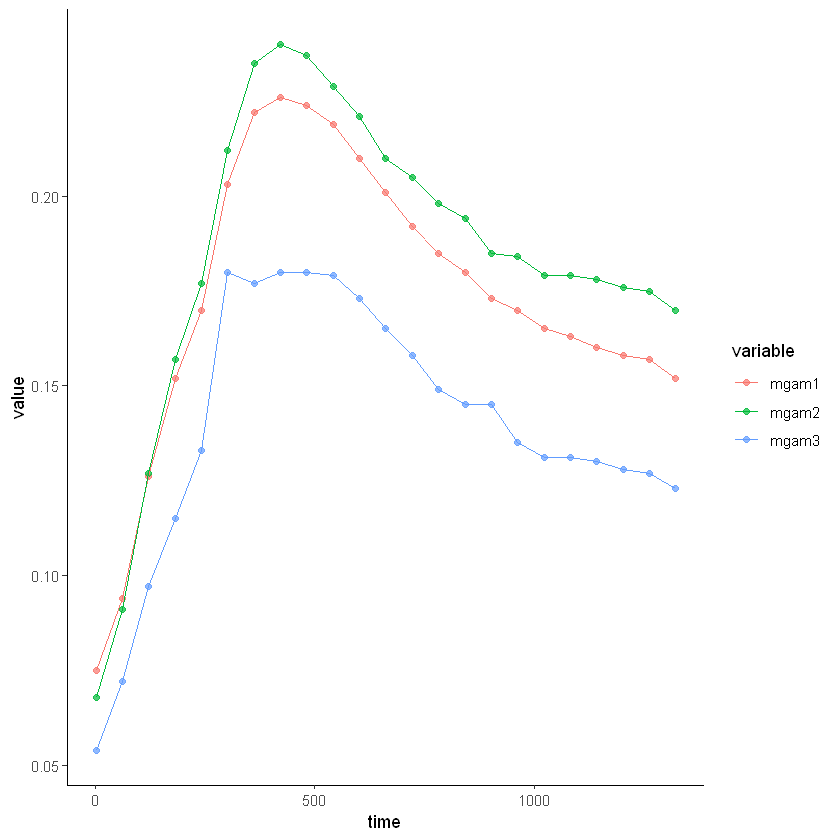

In [7]:
ggrcm<-ggplot(mgam_high, aes(x = time, y = value, col=variable)) + geom_point(alpha=0.7) +geom_line()
ggrcm

## Max Growthrate using Growthrate package

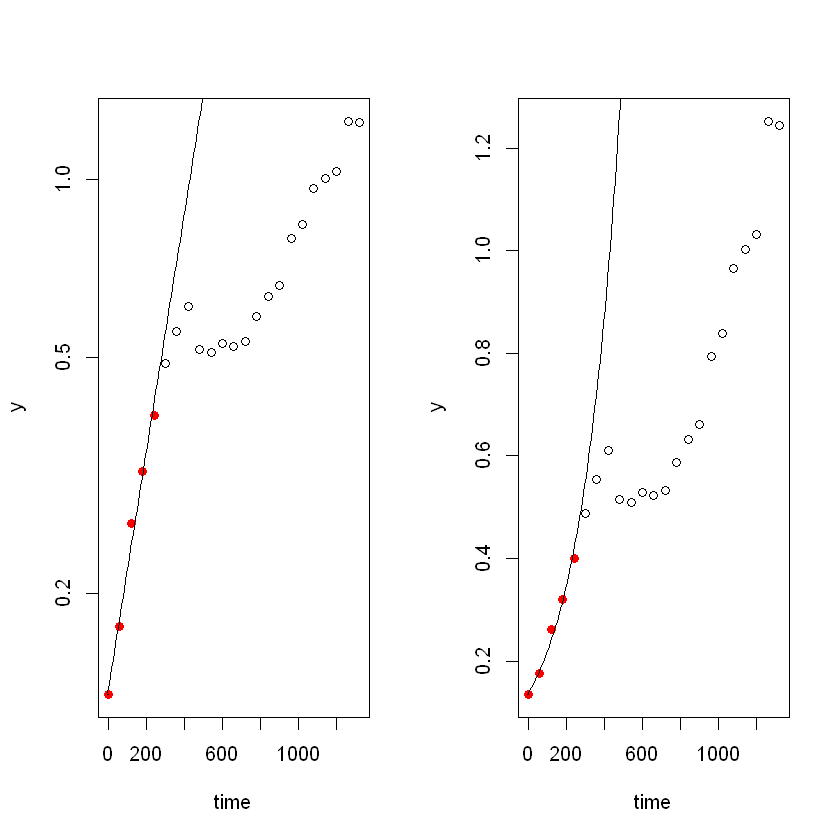

In [8]:
fit <- fit_easylinear(rcm_mgam$time, rcm_mgam$rcm1)
par(mfrow = c(1, 2))
plot(fit, log = "y")
plot(fit)

In [9]:
coef(fit)      # exponential growth parameters
rsquared(fit)

y0        y0_lm        mumax          lag 
 0.135000000  0.136617063  0.004622228 -2.576046547

r2 
0.9855229

## Extension to entire dataset

In [10]:
rcm_mgam_fitted<-apply(rcm_mgam[,2:7],MARGIN=2, function(x) fit_easylinear(rcm_mgam[,1], x))
coef.list<-sapply(rcm_mgam_fitted, function(x) coef(x))
coef.list

,rcm1,rcm2,rcm3,mgam1,mgam2,mgam3
y0,0.135000000,0.158000000,0.154000000,0.075000000,0.068000000,0.054000000
y0_lm,0.136617063,0.164444184,0.158371863,0.076754719,0.070894095,0.056435982
mumax,0.004622228,0.004685832,0.004622775,0.003528677,0.004097784,0.003784994
lag,-2.576046547,-8.531286426,-6.055502862,-6.553946330,-10.171214163,-11.657319220


In [11]:
mumax_rcm<-coef.list[3,1:3]
mumax_mgam<-coef.list[3,4:6]
mumax_rcm
mumax_mgam
typeof(mumax_rcm)

rcm1        rcm2        rcm3 
0.004622228 0.004685832 0.004622775

mgam1       mgam2       mgam3 
0.003528677 0.004097784 0.003784994

[1] "double"

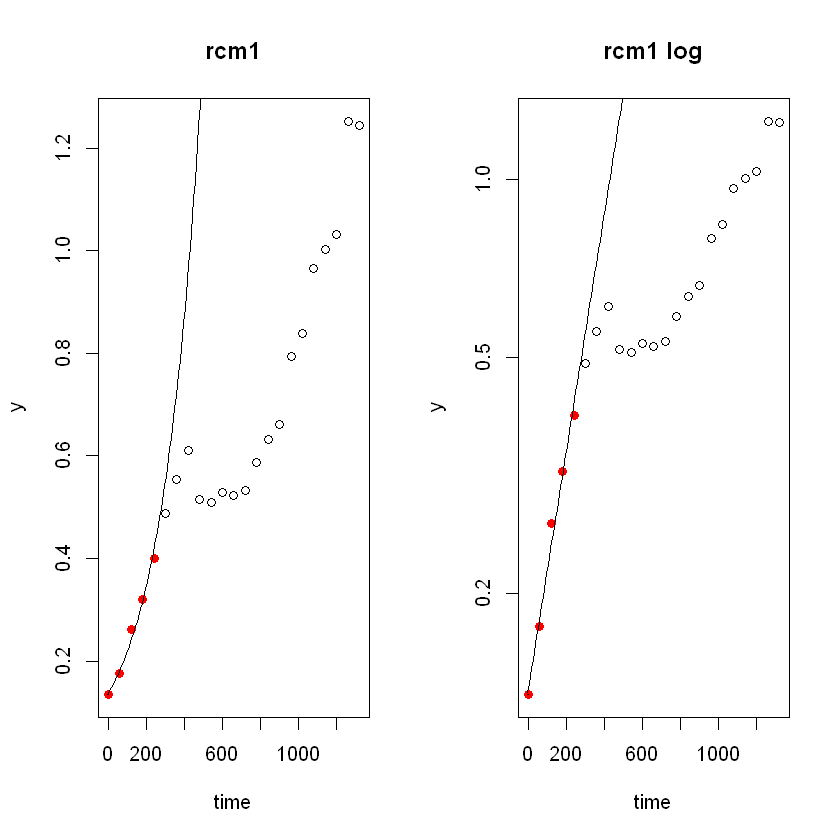

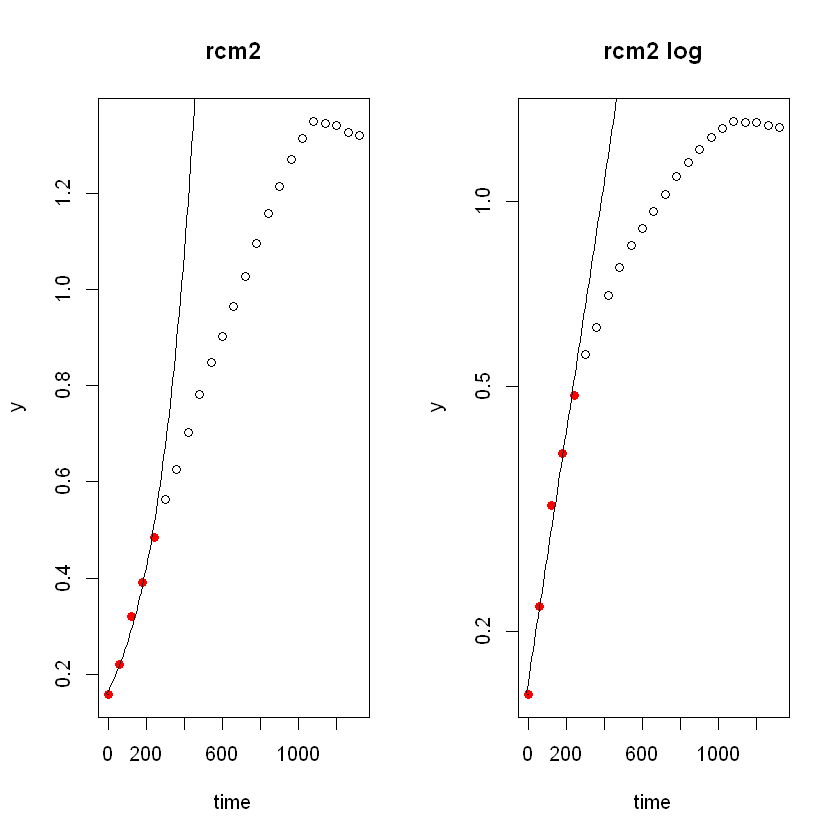

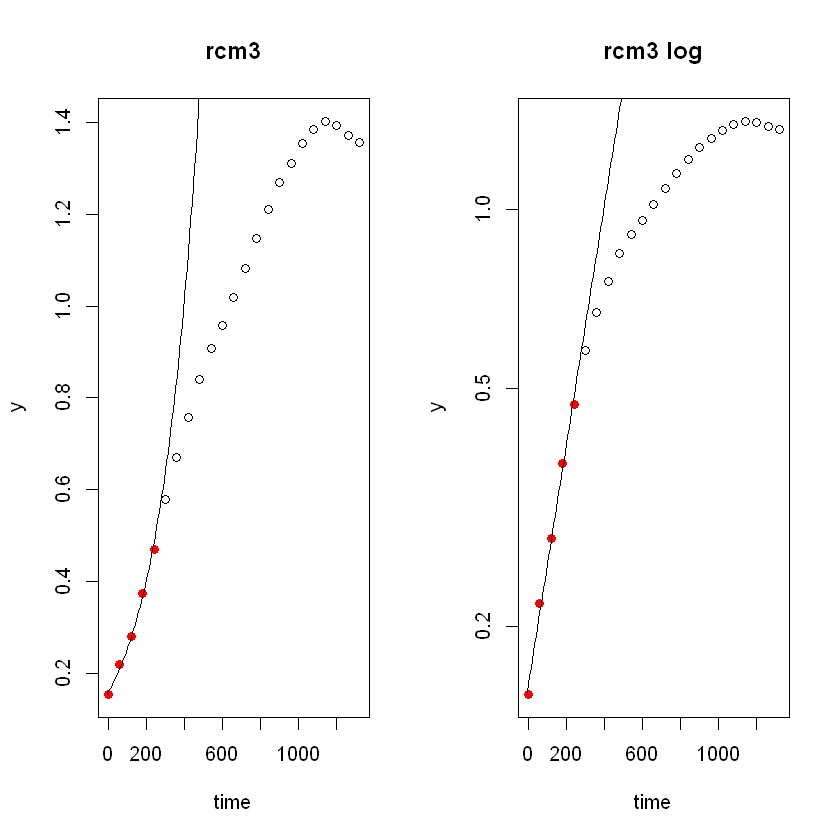

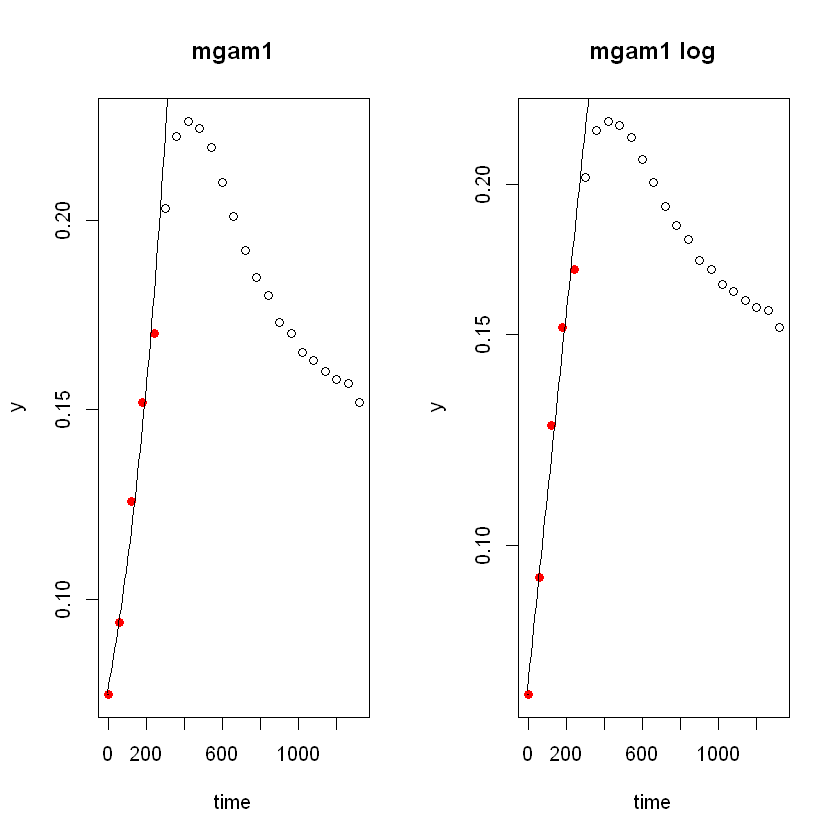

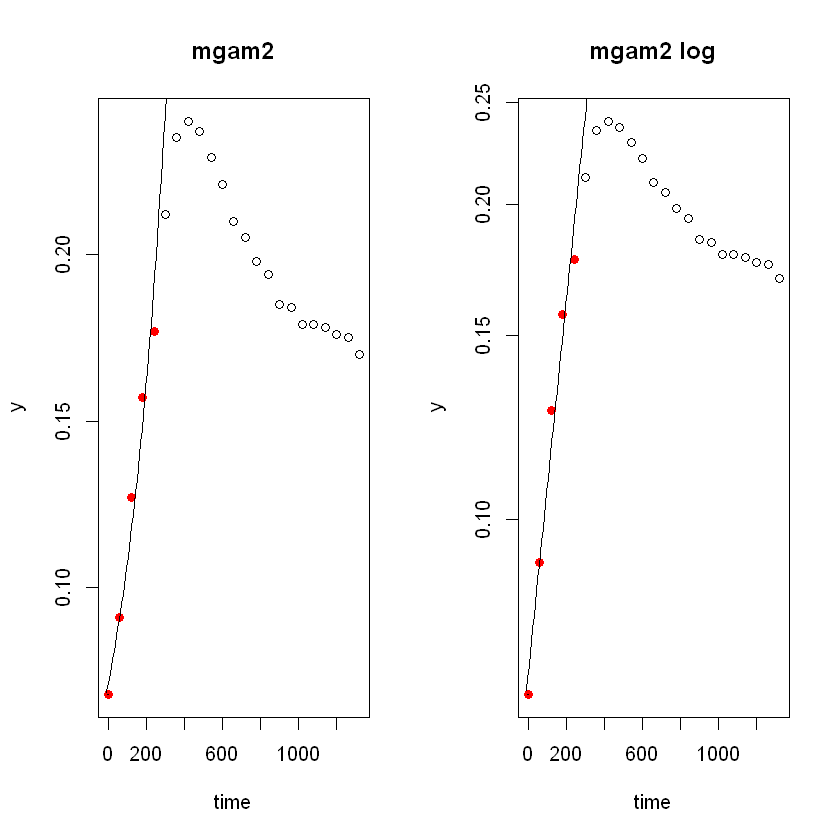

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

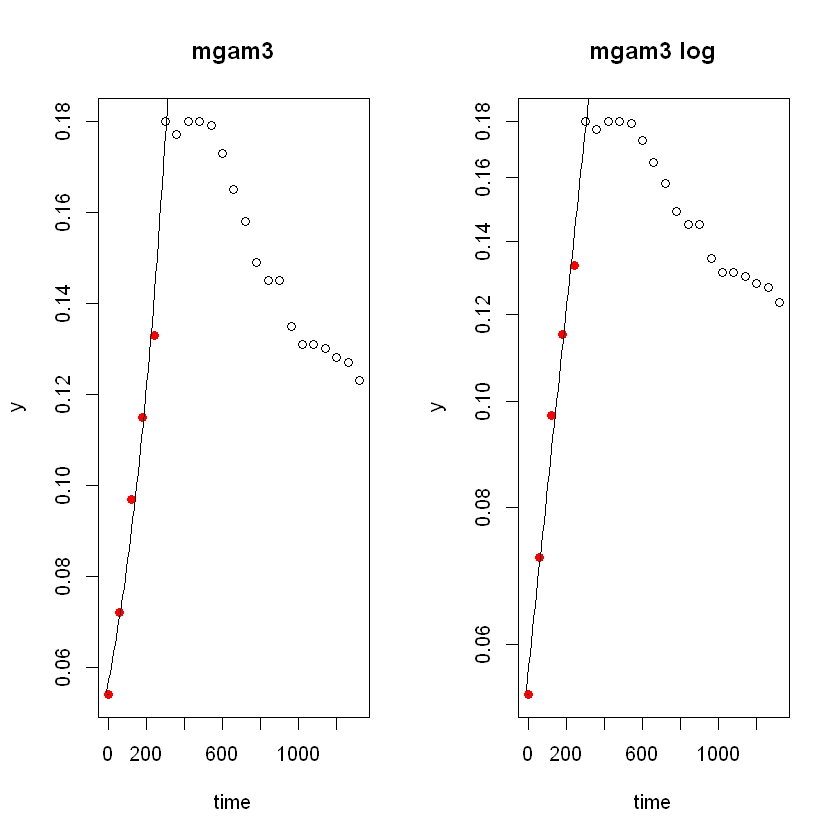

In [12]:
par(mfrow=c(1,2))
lapply(names(rcm_mgam_fitted), function(x) {
    plot(rcm_mgam_fitted[[x]], main=x)
    plot(rcm_mgam_fitted[[x]], log="y", main=paste(x,"log", sep=" "))})

## mMCB
We have 3 tables, FP4, FP14, FP15; time in now in minutes, starting from -10 to 2880 (48 hours). In this case we have to consider the dilution of the culture, by multiplying the dilution value for the measured OD value to obtain the actual concentration

In [13]:
FP4<-read.table("Data/FP4_OD600", header = T)
FP14<-read.table("Data/FP14_OD600", header = T)
FP15<-read.table("Data/FP14_OD600", header = T)
head(FP4)

,Time,Dilution,OD1,OD2,OD3
,<int>,<int>,<dbl>,<dbl>,<dbl>
1,-10,1,0.088,0.088,0.088
2,10,1,0.104,0.104,0.104
3,120,1,0.138,0.138,0.138
4,200,1,0.175,0.175,0.175
5,280,1,0.216,0.216,0.216
6,360,1,0.238,0.238,0.238


In [14]:
mMCB<-lapply(list(FP4,FP14,FP15), function(df){
  df = within(df, {od3<-Dilution*OD3
  od2<-Dilution*OD2
  od1<-Dilution*OD1}, keepAttrs=TRUE)})
names(mMCB)<-c("FP4","FP14","FP15")
head(mMCB)

Time,Dilution,OD1,OD2,OD3,od1,od2,od3
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-10,1,0.088,0.088,0.088,0.088,0.088,0.088
10,1,0.104,0.104,0.104,0.104,0.104,0.104
120,1,0.138,0.138,0.138,0.138,0.138,0.138
200,1,0.175,0.175,0.175,0.175,0.175,0.175
280,1,0.216,0.216,0.216,0.216,0.216,0.216
360,1,0.238,0.238,0.238,0.238,0.238,0.238
440,1,0.265,0.265,0.265,0.265,0.265,0.265
520,1,0.301,0.301,0.301,0.301,0.301,0.301
600,1,0.372,0.372,0.372,0.372,0.372,0.372


Dropping Dilution and the measured OD values

In [15]:
mMCB<-lapply(mMCB, function(x) x[!(names(x) %in% c("Dilution", "OD1", "OD2", "OD3"))])
head(mMCB)

Time,od1,od2,od3
<int>,<dbl>,<dbl>,<dbl>
-10,0.088,0.088,0.088
10,0.104,0.104,0.104
120,0.138,0.138,0.138
200,0.175,0.175,0.175
280,0.216,0.216,0.216
360,0.238,0.238,0.238
440,0.265,0.265,0.265
520,0.301,0.301,0.301
600,0.372,0.372,0.372


Plotting the growth for the three tables, three replicates each. For the first time points (until min 680) there is no difference.

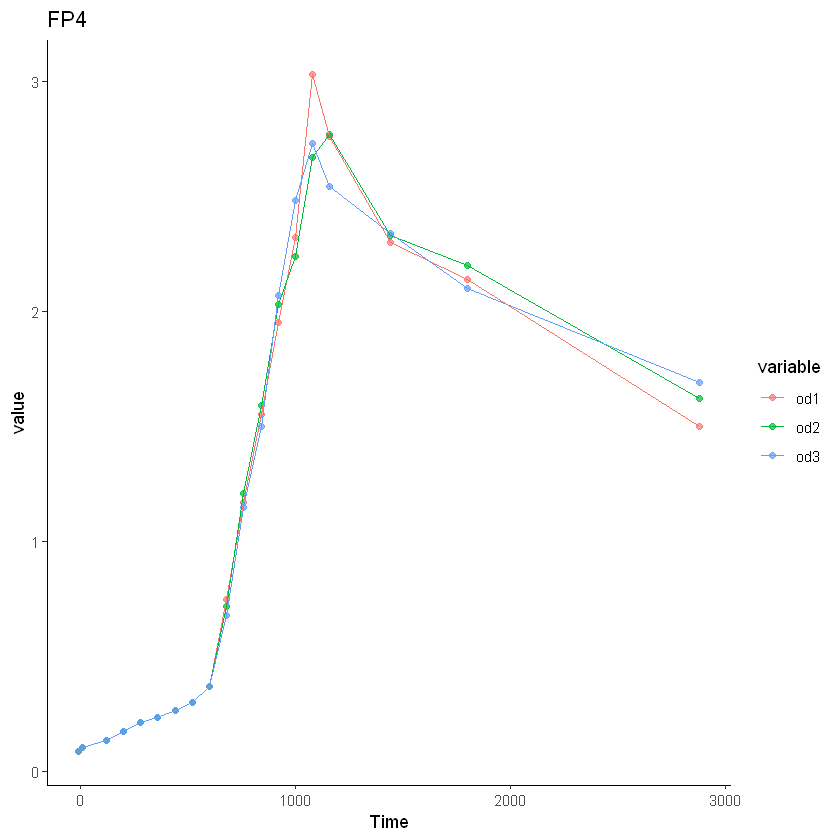

[[1]]

[[2]]

[[3]]


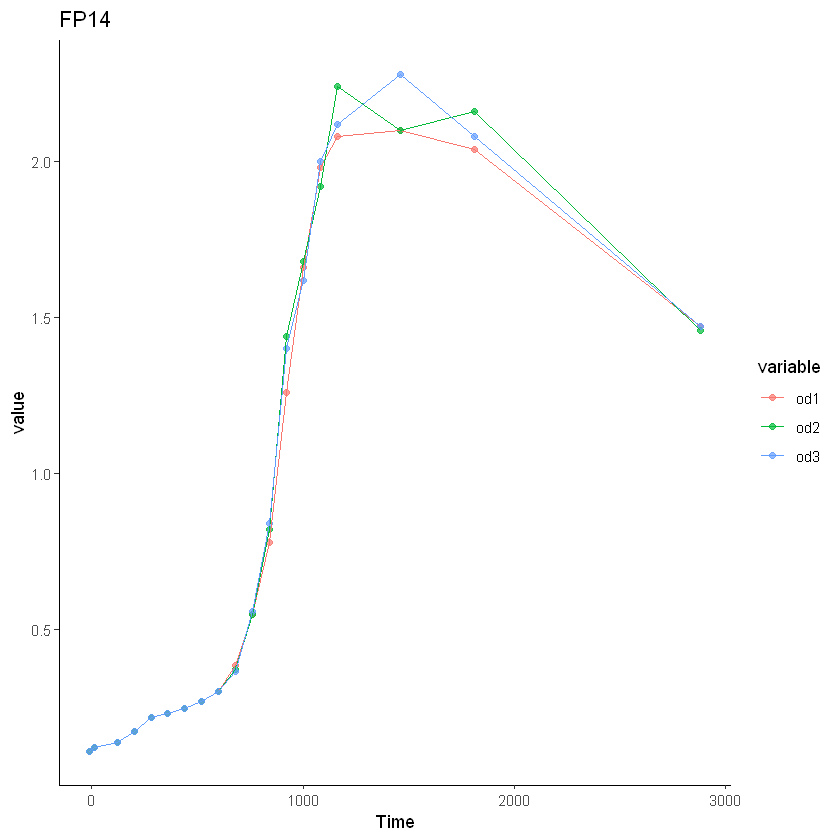

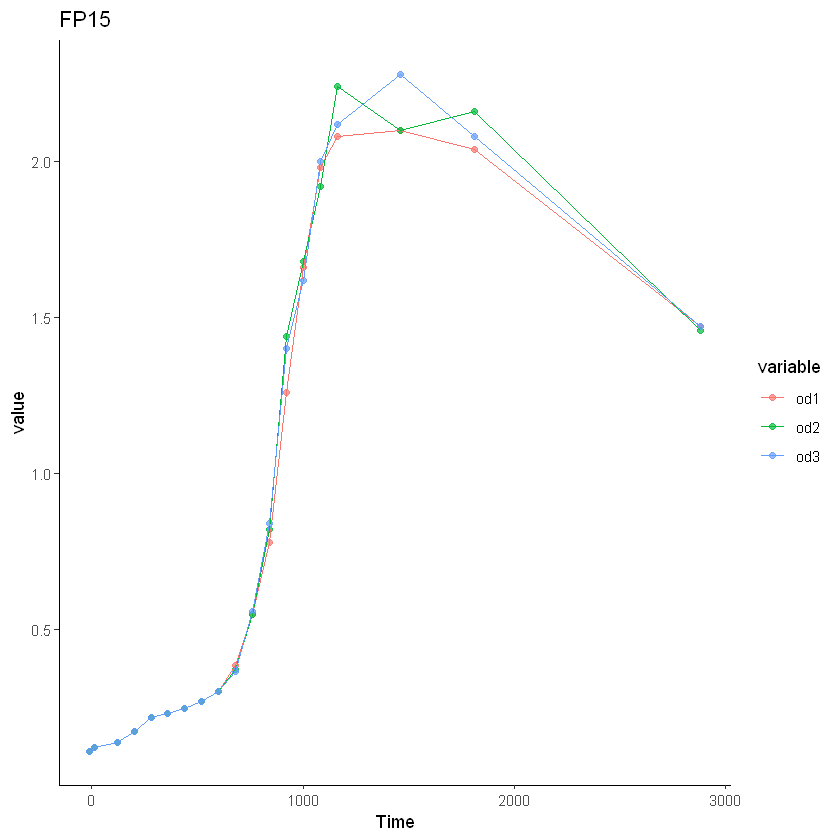

In [16]:
mMCB_high<-melt(mMCB, id.vars="Time")
#par(mfrow=c(1,3))
lapply(c("FP4", "FP14","FP15"), function(x){
  ggplot(mMCB_high[mMCB_high$L1==x,], aes(x = Time, y = value, col=variable)) + 
    geom_point(alpha=0.7) + 
    geom_line() +
    ggtitle(x)
})

### Fitting easy linear
fit_easylinear doesn't like replicates in time, this is why for mMCB I used the minutes and not the hours as time points.

In [17]:
FP4_fitted<-apply(mMCB$FP4[,2:4],MARGIN=2, function(x) fit_easylinear(mMCB$FP4[,1], x)) # put all together in one function
coef4<-sapply(FP4_fitted, function(x) coef(x))

FP14_fitted<-apply(mMCB$FP14[,2:4],MARGIN=2, function(x) fit_easylinear(mMCB$FP14[,1], x))
coef14<-sapply(FP14_fitted, function(x) coef(x))

FP15_fitted<-apply(mMCB$FP15[,2:4],MARGIN=2, function(x) fit_easylinear(mMCB$FP15[,1], x))
coef15<-sapply(FP15_fitted, function(x) coef(x)) 

In [18]:
mumax_mmcb=rbind(coef4[3,],coef14[3,],coef15[3,])
mumax_mmcb

od1,od2,od3
0.005529581,0.005635300,0.005124776
0.004683025,0.004651422,0.004575890
0.004683025,0.004651422,0.004575890


I want the mean for each experiment (mean of the three replicates of one day)

In [19]:
mumax_mmcb<-data.frame(mumax_mmcb)
mumax_mmcb$mean<-apply(mumax_mmcb[,1:3],1,mean)
#mumax_mmcb<-data.frame(mumax_mMCB$mean, row.names=(c("mmcb1", "mmcb2", "mmcb3")))
mumax_mmcb<-mumax_mmcb$mean

In [20]:
mumax_mmcb

[1] 0.005429886 0.004636779 0.004636779

## Comparing the max growthrates

Plotting the three mumax separately

0.004622228
0.004622502
0.004622775
0.004654304
0.004685832
0.004593765
0.004651786
0.003528677
0.003656835
0.003784994
0.003941389


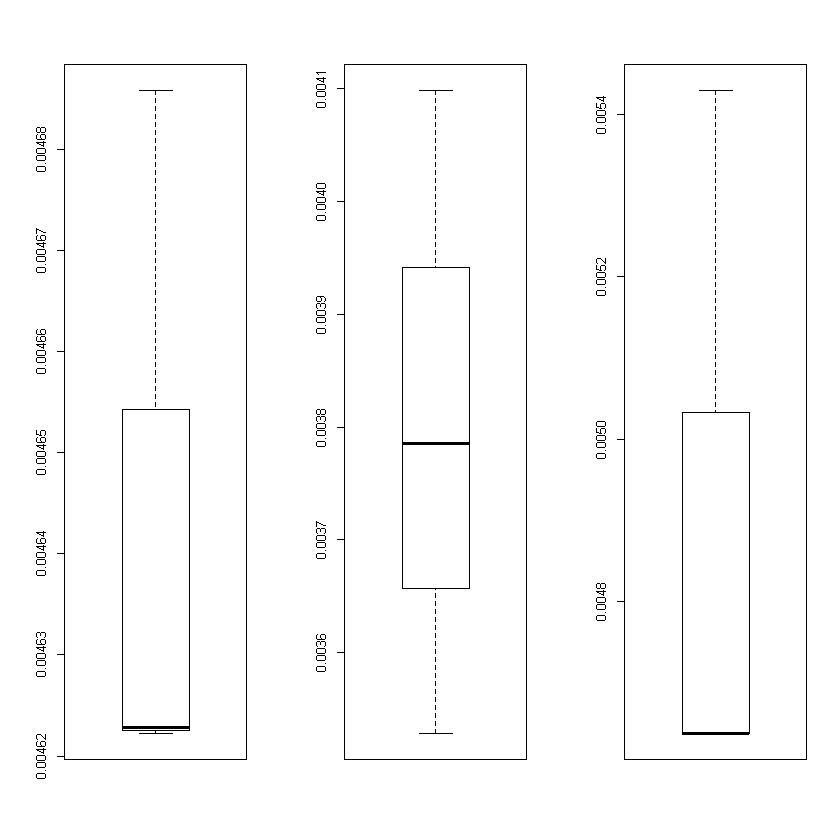

In [21]:
par(mfrow=c(1,3))
#options(repr.plot.width=4, repr.plot.height=3)
lapply(list(mumax_rcm,mumax_mgam,mumax_mmcb), function(x) boxplot(x)) #supressing the stats output?? How to?

All the max growthrates in one graph.

In [22]:
medium<-c("rcm","rcm","rcm","mgam","mgam","mgam", "mmcb", "mmcb", "mmcb")
mumax_high<-rbind(melt(coef.list[3,]), melt(mumax_mmcb))
mumax_high<-cbind(mumax_high, medium)
mumax_high

,value,medium
,<dbl>,<fct>
rcm1,0.004622228,rcm
rcm2,0.004685832,rcm
rcm3,0.004622775,rcm
mgam1,0.003528677,mgam
mgam2,0.004097784,mgam
mgam3,0.003784994,mgam
1,0.005429886,mmcb
2,0.004636779,mmcb
3,0.004636779,mmcb


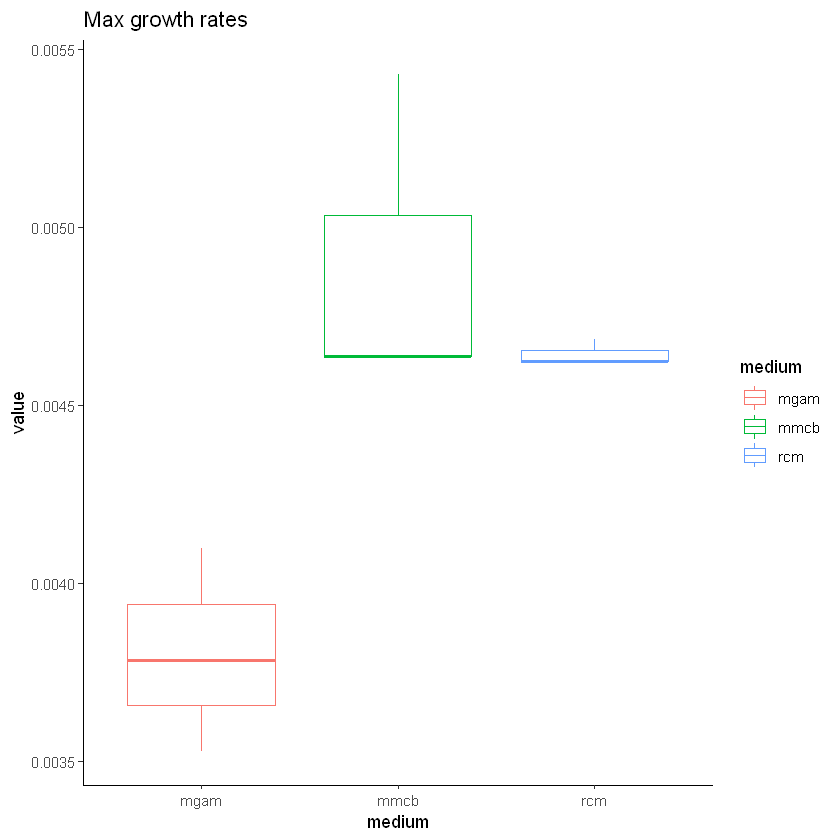

In [23]:
ggplot(mumax_high, aes(x = medium, y = value, color=medium)) + 
  geom_boxplot() +
  ggtitle("Max growth rates")

RCM and mMCB contain acetate (said it wrong in presentation). Also look at standard deviations:

In [24]:
sd(mumax_mgam)
sd(mumax_mmcb)
sd(mumax_rcm) #very low dispersion, can see it in the boxplot

[1] 0.0002850199

[1] 0.0004579005

[1] 3.656459e-05

### First mean per time step (instead of mean of the maximum growth rate)
It should be the same. First do the mean for each time step for each medium and then fit the linear regression to those data points.